### Problem statment:

With increased number of energy reports from international and business organizations, it is now necessary to have an idea where trends are heading in the energy debate. 

One way to see were trends are is to get the main keywords or the main themes of discussions through processing words from published energy reports. 

### The Goal

produce a wordbacg for each report.

In [1]:
!pip install PyPDF2

You should consider upgrading via the 'c:\users\m.amer\appdata\local\continuum\anaconda3\python.exe -m pip install --upgrade pip' command.


In [2]:
import os
import sys
import re
import time
import PyPDF2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('stopwords');
from bs4 import BeautifulSoup
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\M.Amer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\M.Amer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
def getPageCount(pdf_file):

    pdfFileObj = open(pdf_file, 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    pages = pdfReader.numPages
    return pages

In [4]:
def extractData(pdf_file, page):

    pdfFileObj = open(pdf_file, 'rb')
    pdfReader = PyPDF2.PdfFileReader(pdfFileObj)
    pageObj = pdfReader.getPage(page)
    data = pageObj.extractText()
    return data

In [5]:
def getWordCount(data):

    data=data.split()
    return len(data)

In [6]:
numPages = getPageCount('WOO2021_embargoed_copy.pdf')

In [7]:
data = extractData('WOO2021_embargoed_copy.pdf', 10)

In [8]:
text_total = " "
for i in range(numPages):
    text = extractData('WOO2021_embargoed_copy.pdf', i)
    text_total = text_total+text

text_total

" World\nOilOutlook\n2045Organization of the Petroleum Exporting Countries\n2021OPEC is a permanent, intergovernmental organization, established in Baghdad, Iraq, \non 10Œ14 September 1960. The Organization comprises 13 Members: Algeria, Angola, \nRepublic of the Congo, Equatorial Guinea, Gabon, the Islamic Republic of Iran, Iraq, \nKuwait, Libya, Nigeria, Saudi Arabia, the United Arab Emirates and Venezuela. The \nOrganization has its headquarters in Vienna, Austria.\nDigital access to the WOO: \n an interactive user experience 24/7\nDownload\nOPEC WOO App\nAccess the\ninteractive version\nOPEC™s World Oil Outlook (WOO) is part of the Organization™s commitment to market \nstability. The publication is a means to highlight and further the understanding of \nthe many possible future challenges and opportunities for the oil industry. It is also \na channel to encourage dialogue, cooperation and transparency between OPEC and \nother stakeholders within the industry. \nAs part of OPEC™s on

In [9]:
# remove special charachters 

def remove_special(text):
    marks = ['(',')','[',']', '?', '.', ':', ',', '\n']
    for x in text:
        if x in marks:
            text = text.replace(x,"")
    return(text)
text_total = remove_special(text_total)

In [10]:
#Tokenize 
text_total = word_tokenize(text_total)

In [11]:
#stemming

stemmed_text = []
porter = PorterStemmer()
for x in text_total:
    x = porter.stem(x)
    stemmed_text.append(x)
    stemmed_text

In [12]:
len(stemmed_text)

122374

In [13]:
# join total text in a single sentence
text_total = " ".join(text_total)

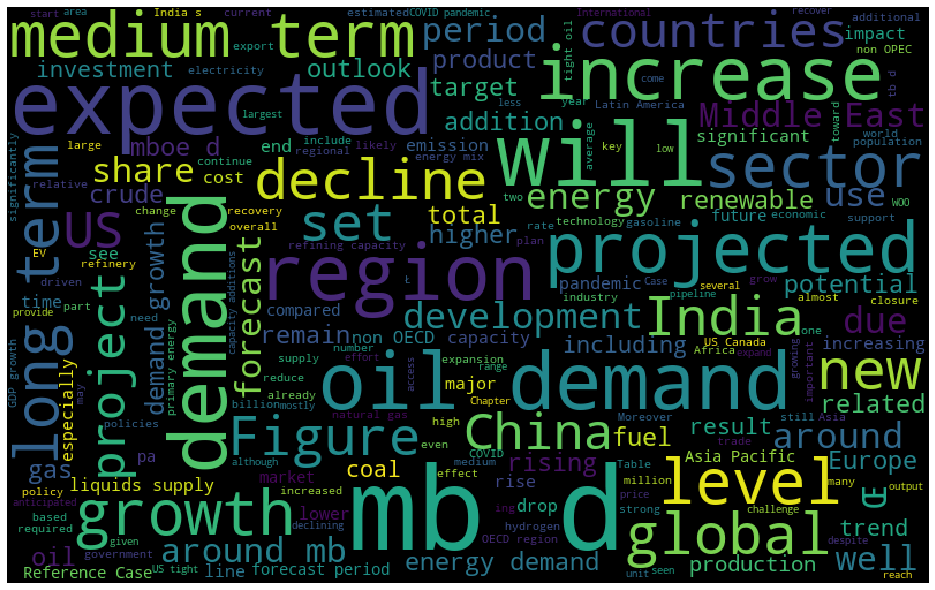

In [14]:
# create a wordbag
# visualization of the stemmed sentences

from wordcloud import WordCloud
wordcloud_low = WordCloud( width = 800, height = 500, random_state = 24,
                         max_font_size = 100).generate(text_total)
plt.figure(figsize=(15,8))
plt.axis('off')
plt.imshow(wordcloud_low)
plt.tight_layout(pad = 0)
plt.show()